In [31]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import skimage

In [32]:
img = cv.imread('foreground/fg-1.jpg')
orignal_mask = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [33]:
binary_mask = cv.adaptiveThreshold(
    orignal_mask, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

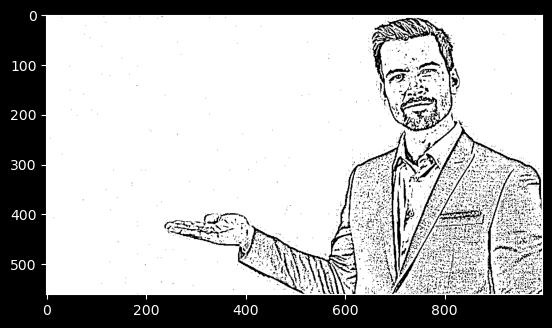

In [34]:
plt.imshow(binary_mask, cmap='gray')

In [35]:
binary_mask = cv.bitwise_not(binary_mask)

In [36]:
# cv.fastNlMeansDenoising(binary_mask, binary_mask, 37, 10, 25)

In [37]:
binary_mask = skimage.morphology.opening(binary_mask, np.ones((3, 3)))

In [38]:
# binary_mask = cv.erode(binary_mask, (21,21), iterations=3)
# binary_mask = cv.erode(binary_mask, (15,15), iterations=1)

In [39]:
# cv.fastNlMeansDenoising(binary_mask, binary_mask, 3, 7, 5)


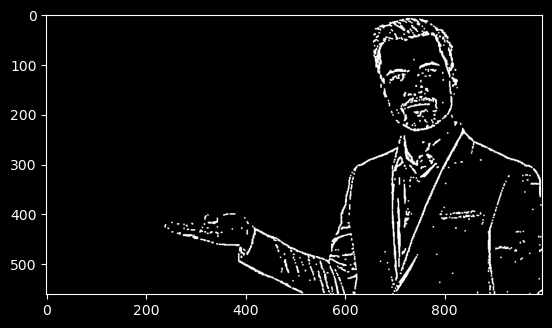

In [40]:
plt.imshow(binary_mask, cmap='gray')


In [41]:
binary_mask = cv.bitwise_not(binary_mask)

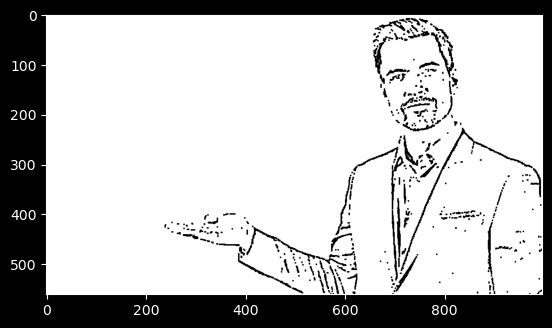

In [42]:
plt.imshow(binary_mask, cmap='gray')

In [43]:
height, width, _ = img.shape
left_margin_proportion = 0.3
right_margin_proportion = 0.3
up_margin_proportion = 0.1
down_margin_proportion = 0.1

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)


In [44]:
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)


In [45]:
mask = np.zeros((height, width), np.uint8)
mask[:] = cv.GC_PR_BGD
mask[binary_mask == 0] = cv.GC_FGD

In [46]:
cv.grabCut(
    img,
    mask,
    boundary_rectangle,
    background_model,
    foreground_model,
    5,
    cv.GC_INIT_WITH_MASK,
)


(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3]], dtype=uint8),
 array([[5.86798257e-01, 0.00000000e+00, 2.41730445e-02, 3.89028698e-01,
         0.00000000e+00, 1.12875289e+02, 2.03314798e+02, 1.25025577e+02,
         8.80000000e+01, 8.03333333e+01, 7.70000000e+01, 1.19214217e+02,
         1.96892141e+02, 1.30301383e+02, 1.00579019e+02, 1.85634260e+02,
         1.14071903e+02, 2.30570312e+02, 2.12168403e+02, 1.98952257e+02,
         2.81233798e+01, 1.88017403e+01, 1.15500336e+01, 1.88017403e+01,
         1.89621270e+01, 1.10941072e+01, 1.15500336e+01, 1.10941072e+01,
         6.99130294e+00, 7.46766667e+01, 4.80000000e+01, 5.46666667e+01,
         4.80000000e+01, 3.08988889e+01, 3.50000000e+01, 5.46666667e+01,
         3.50000000e+01, 4.06766667e+01, 8.52552798e+01, 4.50651337e+01,
         5.14477149e+01, 4.50651337e+01, 1.2

In [47]:
grabcut_mask = np.where((mask == cv.GC_PR_BGD) | (mask == cv.GC_BGD), 0, 1).astype(
    "uint8"
)


In [48]:
segmented_image = img.copy() * grabcut_mask[:, :, np.newaxis]

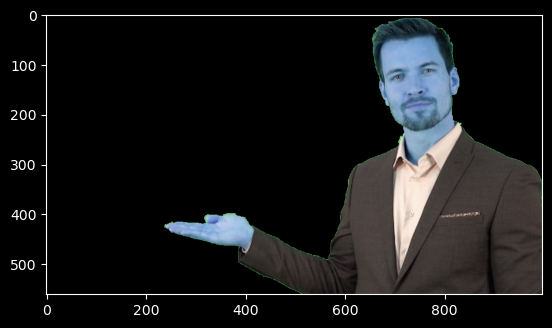

In [49]:
plt.imshow(segmented_image)

In [50]:
bg = cv.imread('background/bg-1.jpg')
bg = cv.resize(bg, (width, height),fx=0,fy=0, interpolation = cv.INTER_CUBIC)

In [51]:
segmented_bg = bg.copy() * (1 - grabcut_mask[:, :, np.newaxis])

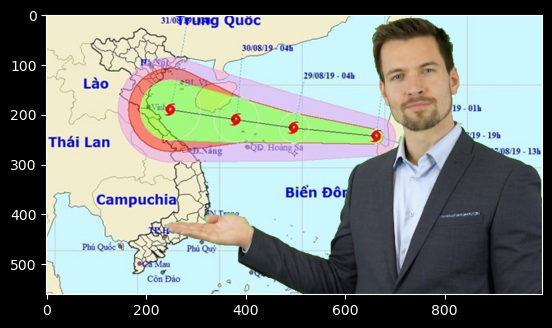

In [52]:
newimg = segmented_image + segmented_bg
newimg = cv.cvtColor(newimg, cv.COLOR_BGR2RGB)
plt.imshow(newimg)